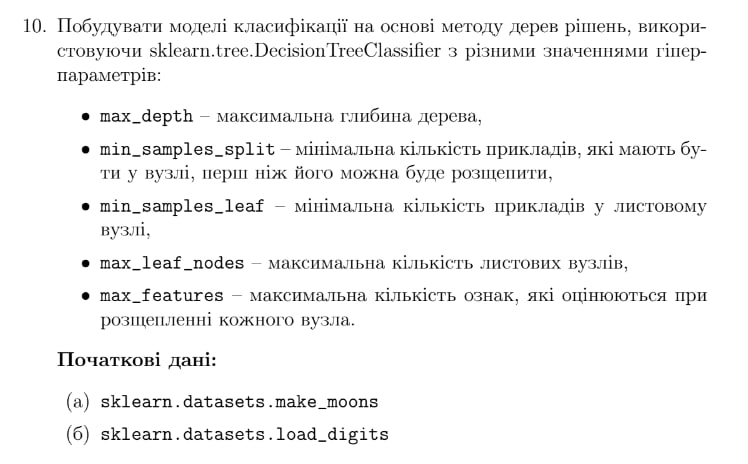

In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets
import sklearn.metrics as metrics
# бібліотеки для візуалізації
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import sklearn.metrics
# візуалізація границь рішень, встановлюється через:
# pip install git+https://github.com/PanWu/pylib.git
import pylib.plot

X, y = sklearn.datasets.load_digits(return_X_y=True)

In [2]:
def draw_tree(model_tree):
    plt.figure(figsize=(20, 15))
    plot_tree(model_tree, filled=True)
    plt.show

In [3]:
def confussion_matrix(y_true, y_predicted):
    confussion = metrics.confusion_matrix(y_true, y_predicted)
    sns.heatmap(confussion, annot=True, fmt='g', cmap='Blues')
    print(f'accuracy: {metrics.accuracy_score(y_true, y_predicted)} \n \
    precision: {metrics.precision_score(y_true, y_predicted, average="micro")} \n \
    recall: {metrics.recall_score(y_true, y_predicted, average="micro")} \n \
    f1_score: {metrics.f1_score(y_true, y_predicted, average="micro")}')

In [4]:
np.shape(X)

(1797, 64)

Числа у цьому датасеті представляються матрицею 8 x 8 (інтенсивності білого кольору для кожного пікселя). Далі ця матриця "розгортається" у вектор довжини 64, виходить ознаковий опис об'єкта.

In [5]:
X[0, :].reshape([8, 8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

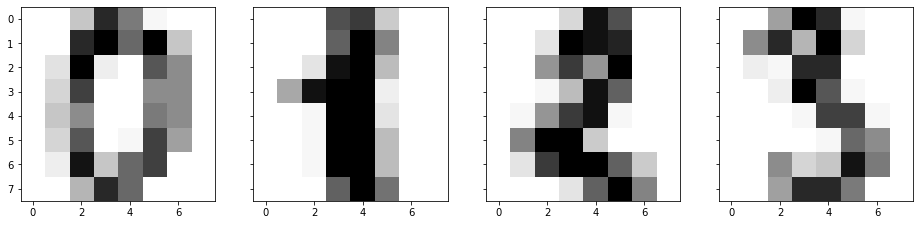

In [6]:
# оголошуємо вісі для графіків
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16, 6))  
# виводимо малюнки рукописних цифр
for i in range(4):
    axes[i].imshow(X[i, :].reshape([8, 8]), cmap="Greys");

In [7]:
np.bincount(y)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64)

Бачимо, що розподіл цифр +- однаковий

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.2,
                     random_state=17)

Як коефіцієнт оцінки будемо використовувати ентропію, адже датасет не великий <br>
Оскільки pr та roc curves тільки для бінарних классифікацій, то їх надалі не буде

<font size='5'> max_depth: </font> <br>
Ми будемо перевіряти такі значення: 
- 3
- 7
- None (default)

<font size='5'> 3:</font>

In [9]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [10]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

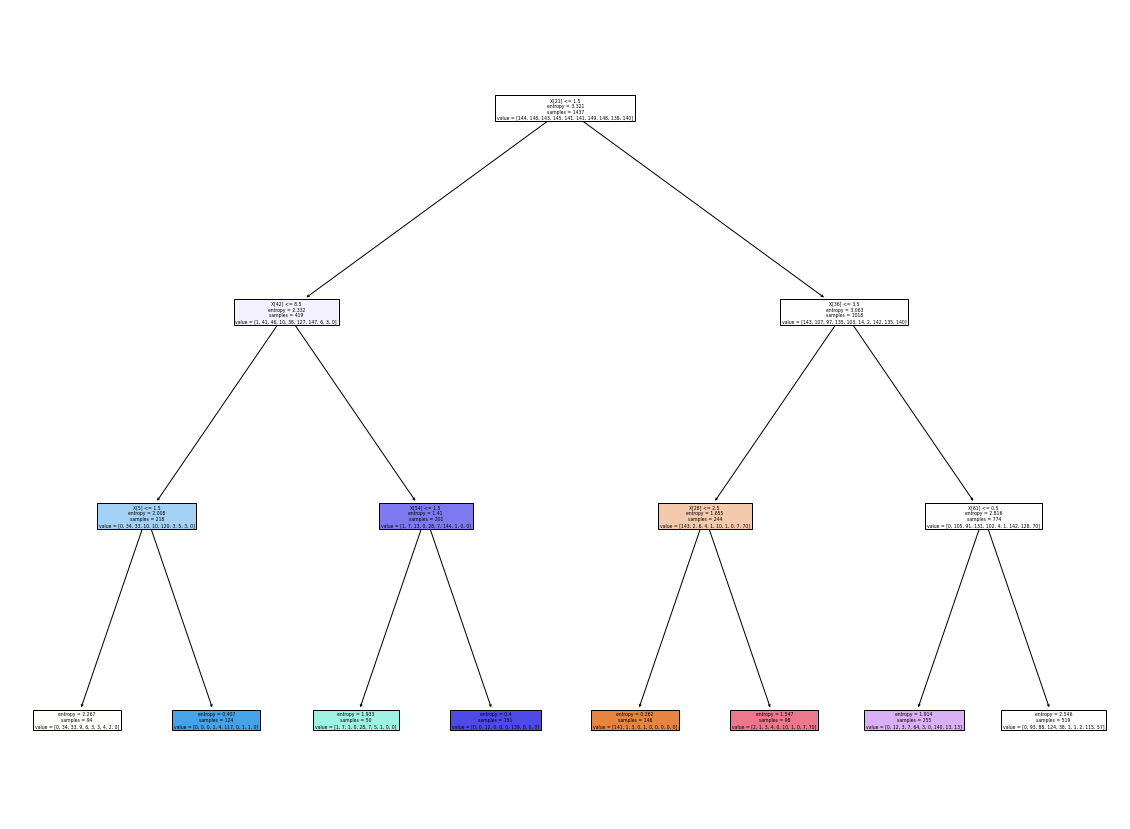

In [11]:
draw_tree(model_tree)

In [12]:
predict = model_tree.predict(X_test)

accuracy: 0.5222222222222223 
     precision: 0.5222222222222223 
     recall: 0.5222222222222223 
     f1_score: 0.5222222222222223


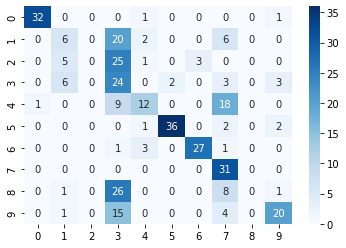

In [13]:
confussion_matrix(y_test, predict)

In [14]:
predict = model_tree.predict(X_train)

accuracy: 0.5518441196938065 
     precision: 0.5518441196938065 
     recall: 0.5518441196938065 
     f1_score: 0.5518441196938065


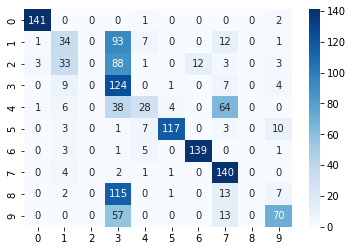

In [15]:
confussion_matrix(y_train, predict)

<font size='5'> 7: </font>

In [16]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [17]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

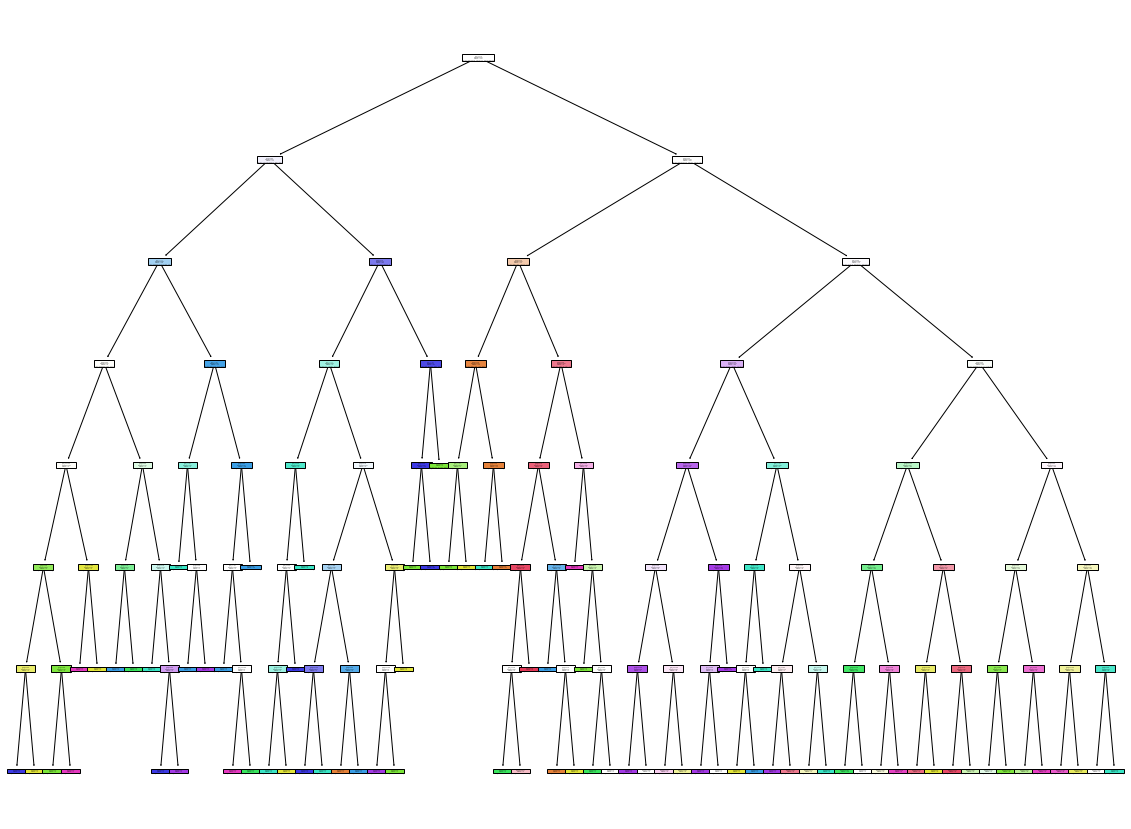

In [18]:
draw_tree(model_tree)

In [19]:
predict = model_tree.predict(X_test)

accuracy: 0.8833333333333333 
     precision: 0.8833333333333333 
     recall: 0.8833333333333333 
     f1_score: 0.8833333333333333


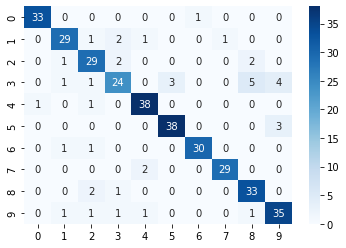

In [20]:
confussion_matrix(y_test, predict)

In [21]:
predict = model_tree.predict(X_train)

accuracy: 0.942936673625609 
     precision: 0.942936673625609 
     recall: 0.942936673625609 
     f1_score: 0.9429366736256091


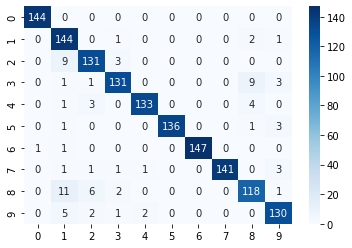

In [22]:
confussion_matrix(y_train, predict)

<font size='5'> None: </font>

In [23]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)

In [24]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

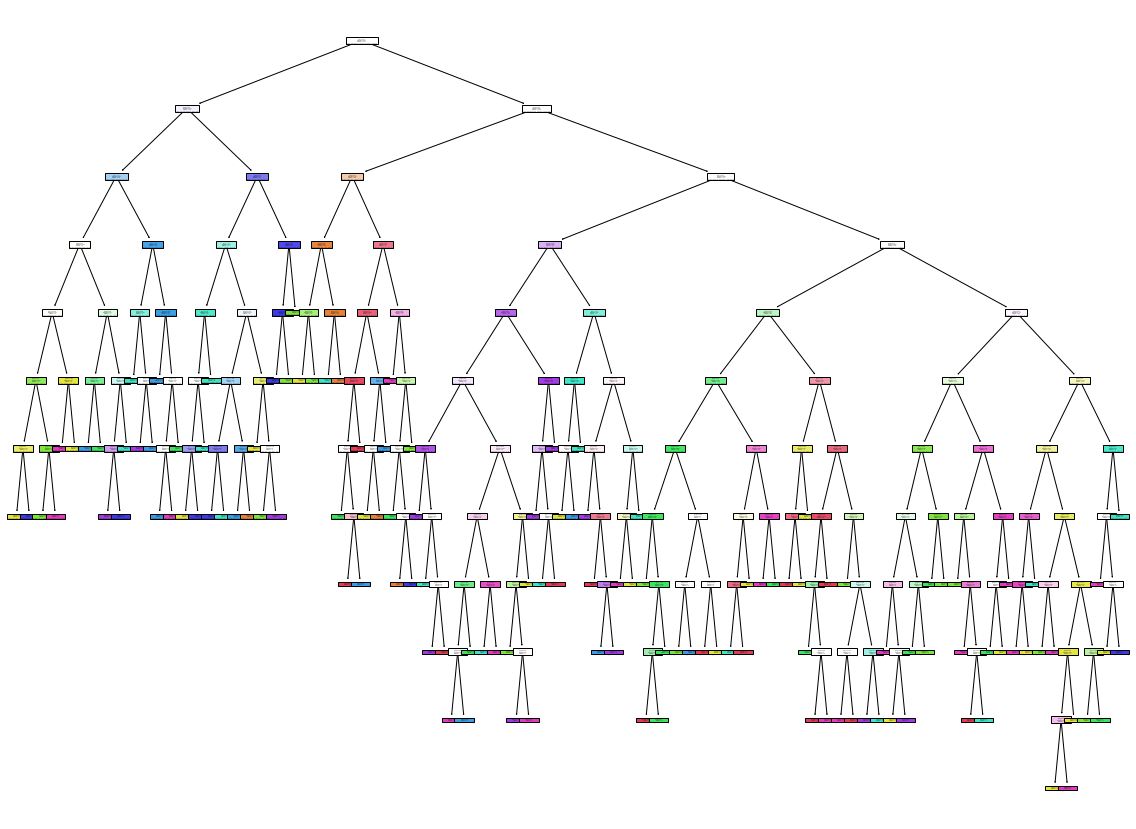

In [25]:
draw_tree(model_tree)

In [26]:
predict = model_tree.predict(X_test)

accuracy: 0.8805555555555555 
     precision: 0.8805555555555555 
     recall: 0.8805555555555555 
     f1_score: 0.8805555555555555


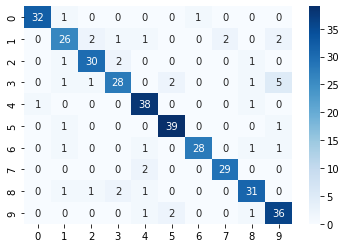

In [27]:
confussion_matrix(y_test, predict)

In [28]:
predict = model_tree.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


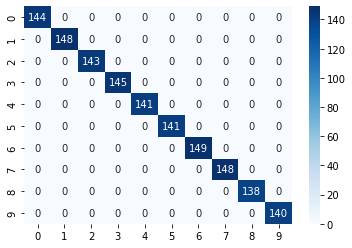

In [29]:
confussion_matrix(y_train, predict)

- <b> 3 </b> <br>
Результати жахливі, модель сильно недонавчана  <br>
- <b>7 </b><br>
Дуже високі значення метрик як для тестової, так і для навчальної вибірки, перенавчання немає <br>
- <b> None (default)</b><br>
Є ознаки перенавчання, хоч і значення метрик для тестової вибірки порівняно гарні (оскільки ознака яка стоїть на default, то це дерево повторюється багато разів) <br> 
<b>Найкращим вийшло значення з max_depth=7, вона не перенавчана і має високе значення точності для тестової вибірки, така сама ситуация була і у попередньому датасеті </b>

In [30]:
model_tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)

In [31]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

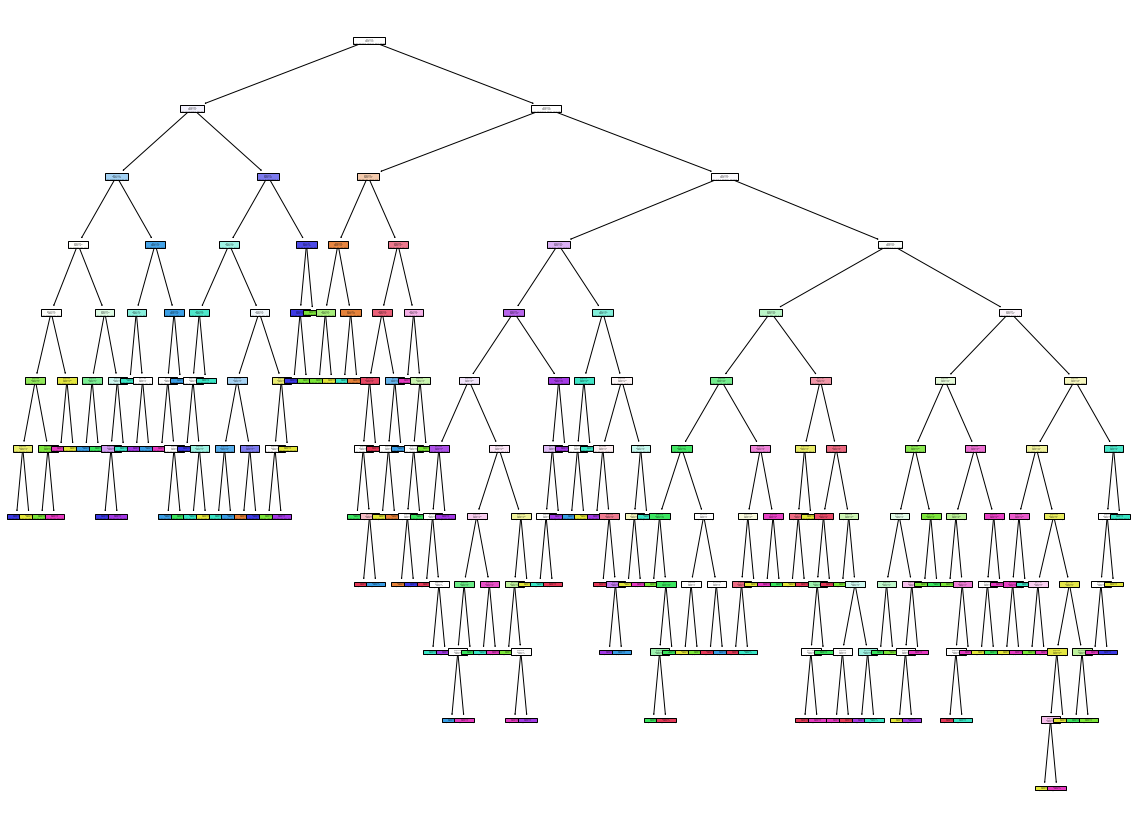

In [32]:
draw_tree(model_tree)

In [33]:
predict = model_tree.predict(X_test)

accuracy: 0.8777777777777778 
     precision: 0.8777777777777778 
     recall: 0.8777777777777778 
     f1_score: 0.8777777777777779


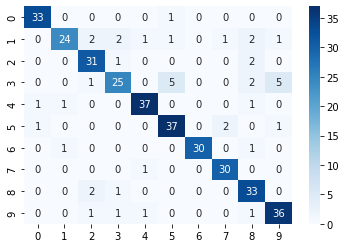

In [34]:
confussion_matrix(y_test, predict)

In [35]:
predict = model_tree.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


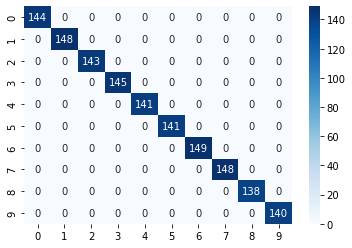

In [36]:
confussion_matrix(y_train, predict)

<font size='5'> 5: </font>

In [37]:
model_tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [38]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

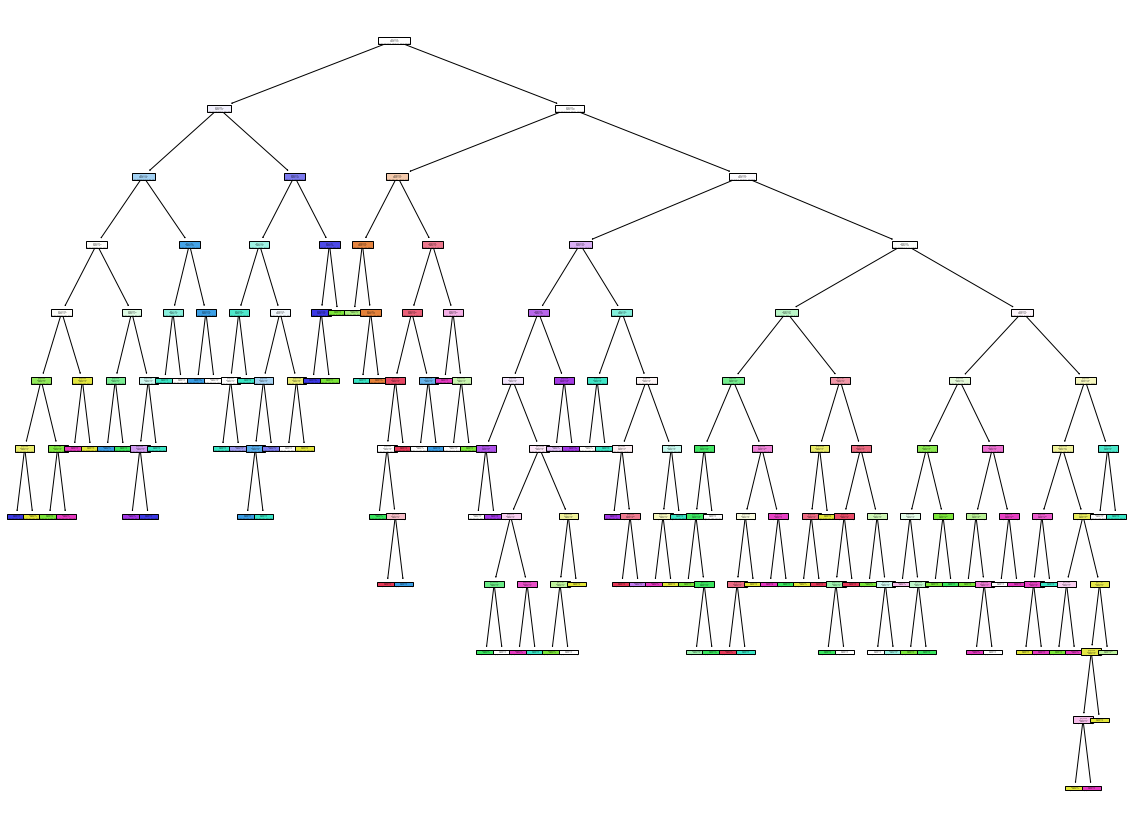

In [39]:
draw_tree(model_tree)

In [40]:
predict = model_tree.predict(X_test)

accuracy: 0.8805555555555555 
     precision: 0.8805555555555555 
     recall: 0.8805555555555555 
     f1_score: 0.8805555555555555


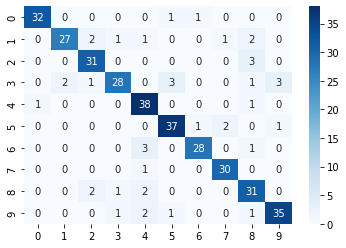

In [41]:
confussion_matrix(y_test, predict)

In [42]:
predict = model_tree.predict(X_train)

accuracy: 0.977731384829506 
     precision: 0.977731384829506 
     recall: 0.977731384829506 
     f1_score: 0.977731384829506


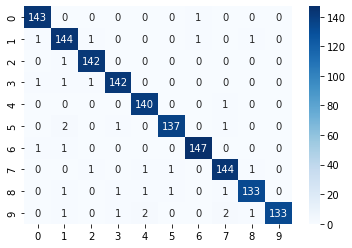

In [43]:
confussion_matrix(y_train, predict)

<font size='5'> 10: </font>

In [44]:
model_tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

In [45]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

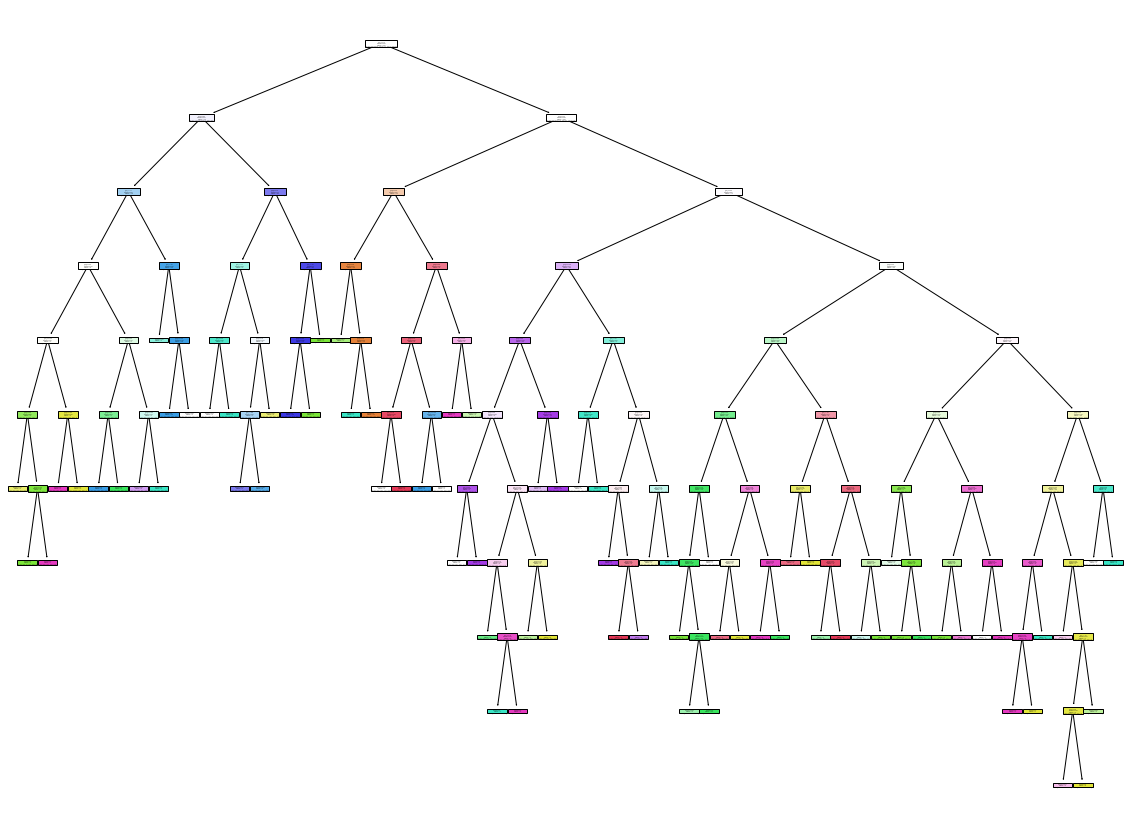

In [46]:
draw_tree(model_tree)

In [47]:
predict = model_tree.predict(X_test)

accuracy: 0.8833333333333333 
     precision: 0.8833333333333333 
     recall: 0.8833333333333333 
     f1_score: 0.8833333333333333


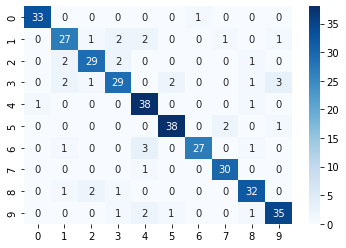

In [48]:
confussion_matrix(y_test, predict)

In [49]:
predict = model_tree.predict(X_train)

accuracy: 0.9554627696590118 
     precision: 0.9554627696590118 
     recall: 0.9554627696590118 
     f1_score: 0.9554627696590118


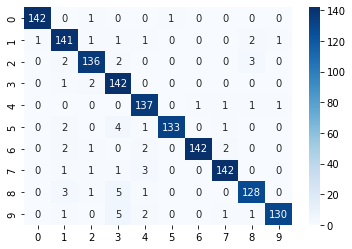

In [50]:
confussion_matrix(y_train, predict)


- <b> 2 (default) </b> <br>
Є ознаки перенавчання (оскільки ознака яка стоїть на default, то це дерево повторюється багато разів) <br>
- <b>5 </b><br>
Такі самі значення метрик тестової вибірки як і у default settings, але на навчальній виборці значення гірші, модель намагалася позбутися перенавчання, але це не допомогло їй на тестовій <br>
- <b> 10 </b><br>
Значення метрик тестової вибірки стали кращі, на навчальній гірше, модель позбулась перенавчання <br> 
<b>Найкращим вийшло значення з на min_samples_split=10, вона отримала одні із найкращих значень метрик, вона порівняно має найменше перенавчання і достатні значення точності, загалом зрозуміло, що завдяки цьому гіперпараметру можна створити модель з найкращим відношенням точності і перенавчання</b>


<font size='5'> min_samples_leaf: </font> <br>
Ми будемо перевіряти такі значення: 
- 1 (default)
- 10
- 30

In [51]:
model_tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1)

In [52]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

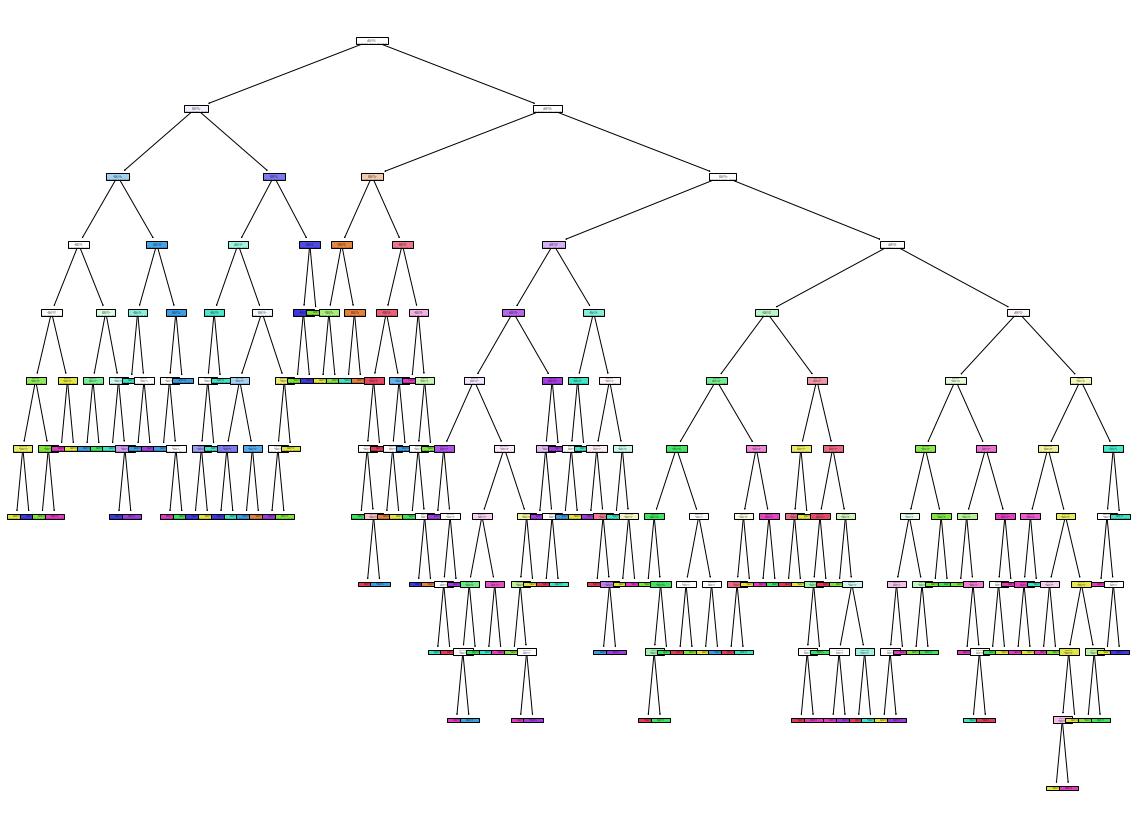

In [53]:
draw_tree(model_tree)

In [54]:
predict = model_tree.predict(X_test)

accuracy: 0.8833333333333333 
     precision: 0.8833333333333333 
     recall: 0.8833333333333333 
     f1_score: 0.8833333333333333


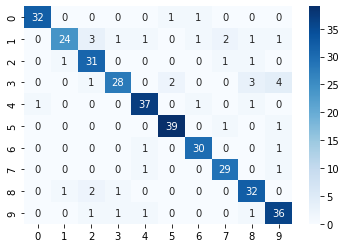

In [55]:
confussion_matrix(y_test, predict)

In [56]:
predict = model_tree.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


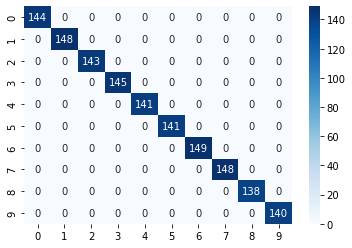

In [57]:
confussion_matrix(y_train, predict)

10:

In [58]:
model_tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)

In [59]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)

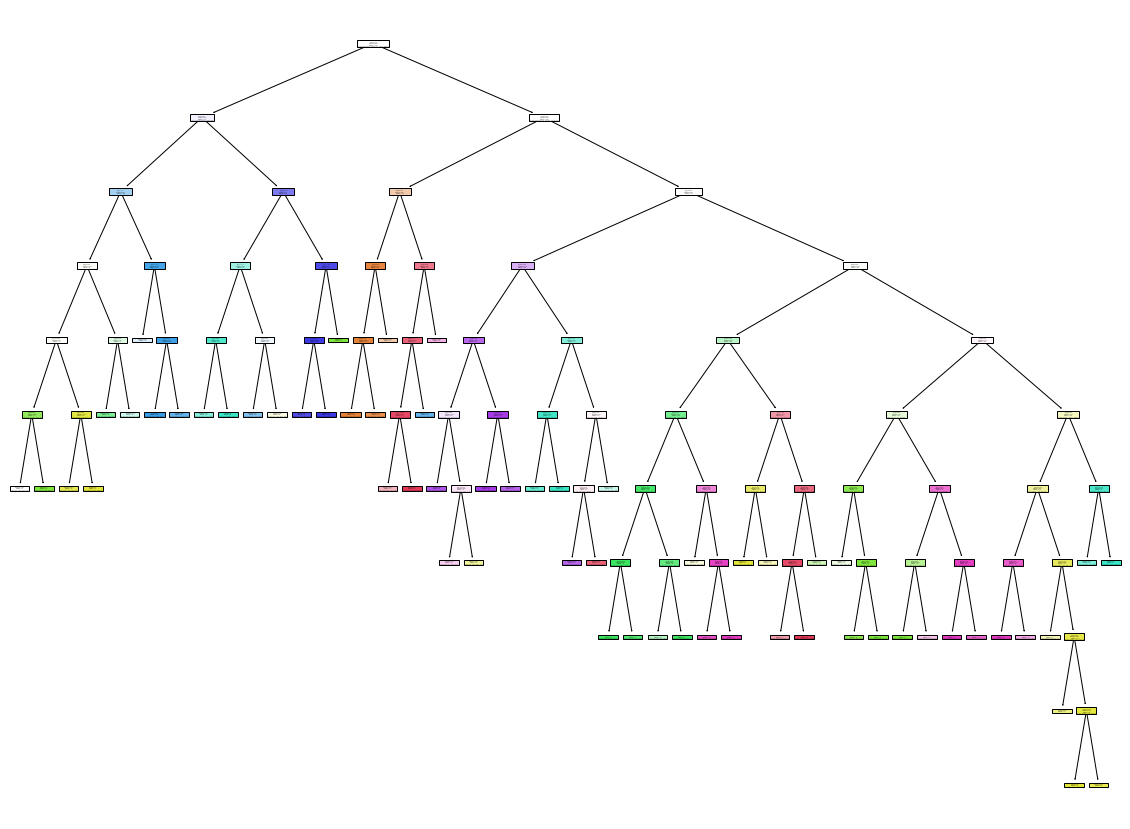

In [60]:
draw_tree(model_tree)

In [61]:
predict = model_tree.predict(X_test)

accuracy: 0.8444444444444444 
     precision: 0.8444444444444444 
     recall: 0.8444444444444444 
     f1_score: 0.8444444444444444


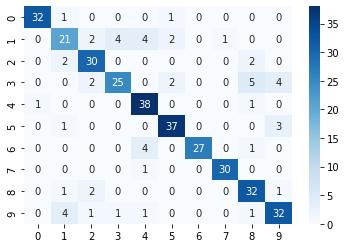

In [62]:
confussion_matrix(y_test, predict)

In [63]:
predict = model_tree.predict(X_train)

accuracy: 0.9004871259568545 
     precision: 0.9004871259568545 
     recall: 0.9004871259568545 
     f1_score: 0.9004871259568545


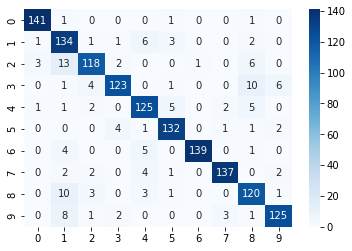

In [64]:
confussion_matrix(y_train, predict)

30:

In [65]:
model_tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=30)

In [66]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=30)

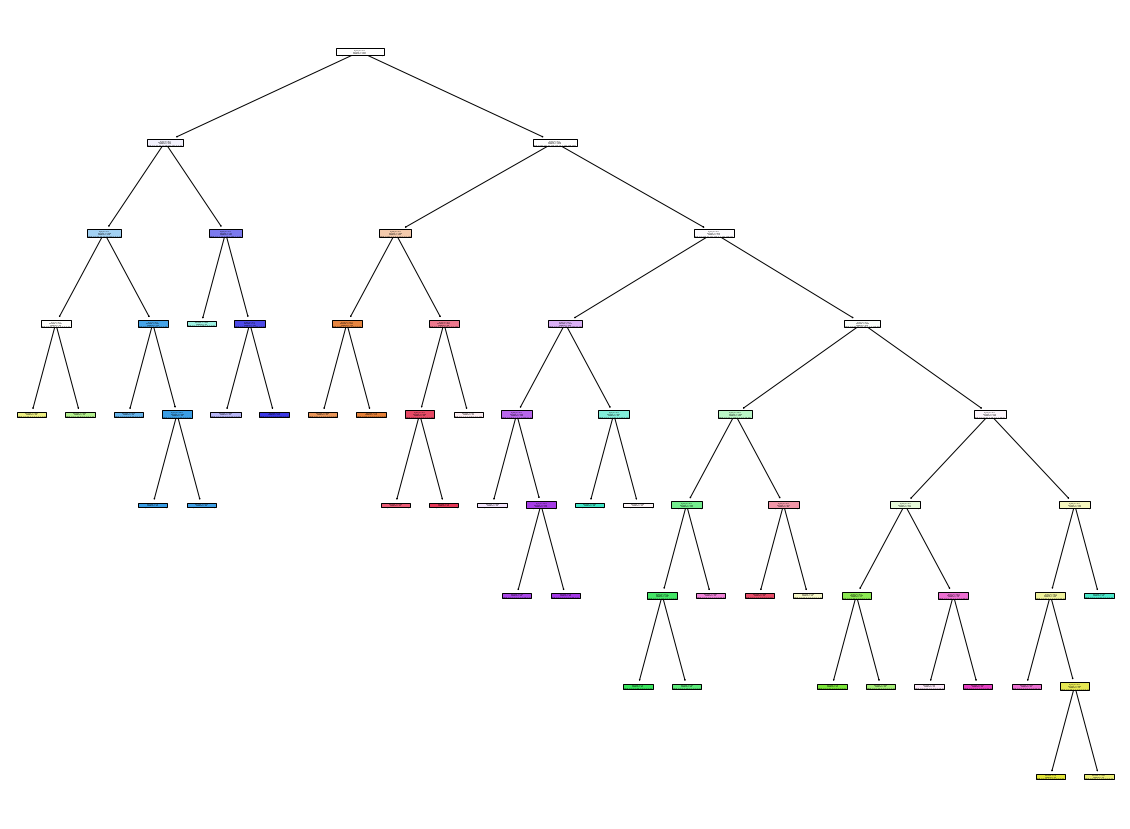

In [67]:
draw_tree(model_tree)

In [68]:
predict = model_tree.predict(X_test)

accuracy: 0.7583333333333333 
     precision: 0.7583333333333333 
     recall: 0.7583333333333333 
     f1_score: 0.7583333333333333


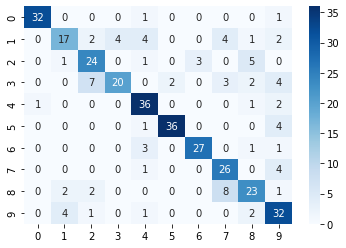

In [69]:
confussion_matrix(y_test, predict)

In [70]:
predict = model_tree.predict(X_train)

accuracy: 0.826722338204593 
     precision: 0.826722338204593 
     recall: 0.826722338204593 
     f1_score: 0.8267223382045931


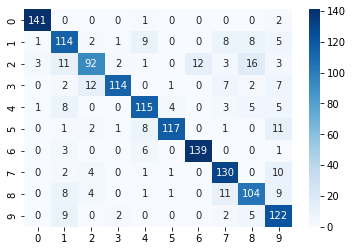

In [71]:
confussion_matrix(y_train, predict)

- <b> 1 (default) </b> <br>
Є ознаки перенавчання, хоч і значення метрик для тестової вибірки порівняно гарні (оскільки ознака яка стоїть на default, то це дерево повторюється багато разів) <br>
- <b> 10 </b><br>
Значення усіх метрик порівняно з default стало гірше, перенавчання немає, модель майже однаково справляється з тестовою і навчальною вибіркою, питання у тому чи є у цьому сенс  <br>
- <b> 30 </b><br>
Значення усіх метрик як для навчальної так і тестової вибірки менше, зрозуміло, що значення цього гіперпараметру повинно бути менше, модель <b> недонавчана  <br> 
<b>Ми не отримали ідеальне значення цього гіперпараметру, завдяки ньому можна попередити перенавчання, але у нас вийшло тільки досягти недонавчання, а значення між default, та завеликим не дало ніякого покращення по метрикам тестової вибірки, а зробило лише гірше для навчальної</b>


<font size='5'> max_leaf_nodes: </font> <br>
Ми будемо перевіряти такі значення: 
- 10
- 25
- None (default)

In [72]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

In [73]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

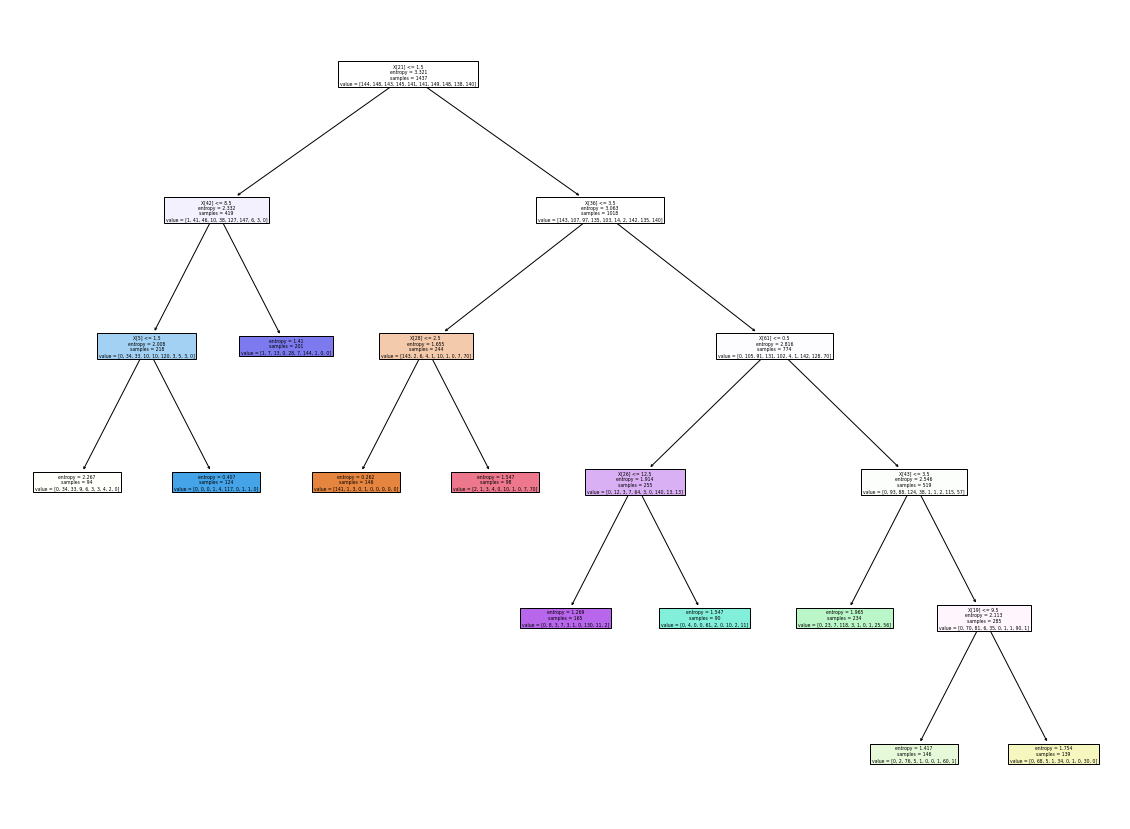

In [74]:
draw_tree(model_tree)

In [75]:
predict = model_tree.predict(X_test)

accuracy: 0.6194444444444445 
     precision: 0.6194444444444445 
     recall: 0.6194444444444445 
     f1_score: 0.6194444444444445


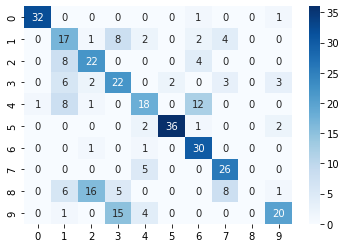

In [76]:
confussion_matrix(y_test, predict)

In [77]:
predict = model_tree.predict(X_train)

accuracy: 0.6673625608907446 
     precision: 0.6673625608907446 
     recall: 0.6673625608907446 
     f1_score: 0.6673625608907446


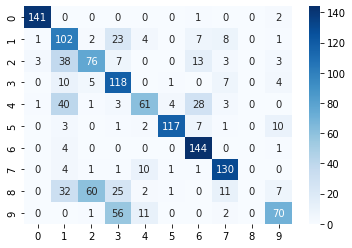

In [78]:
confussion_matrix(y_train, predict)

25:

In [79]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=25)

In [80]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=25)

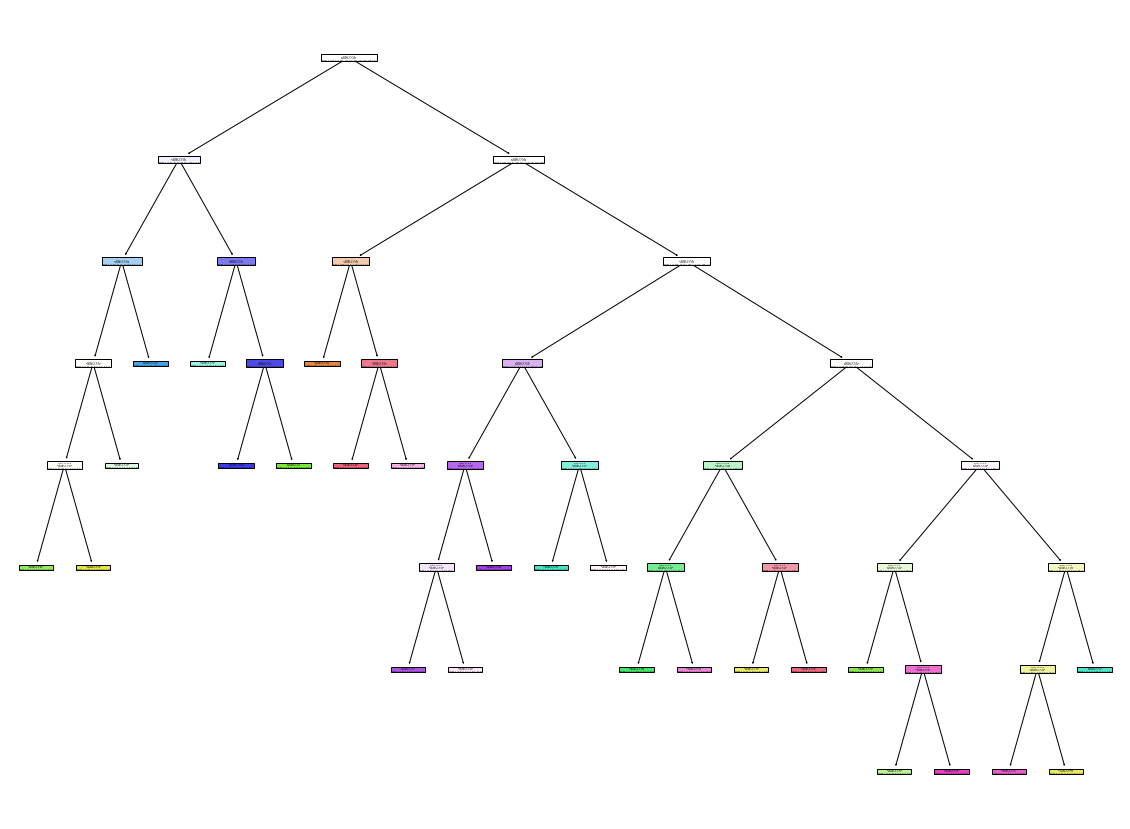

In [81]:
draw_tree(model_tree)

In [82]:
predict = model_tree.predict(X_test)

accuracy: 0.8194444444444444 
     precision: 0.8194444444444444 
     recall: 0.8194444444444444 
     f1_score: 0.8194444444444444


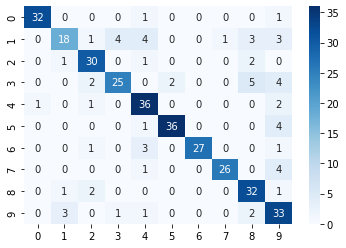

In [83]:
confussion_matrix(y_test, predict)

In [84]:
predict = model_tree.predict(X_train)

accuracy: 0.8629088378566457 
     precision: 0.8629088378566457 
     recall: 0.8629088378566457 
     f1_score: 0.8629088378566457


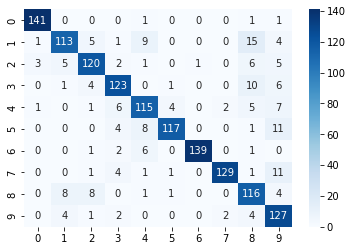

In [85]:
confussion_matrix(y_train, predict)

None:

In [86]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=None)

In [87]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [88]:
model_tree.get_n_leaves()

128

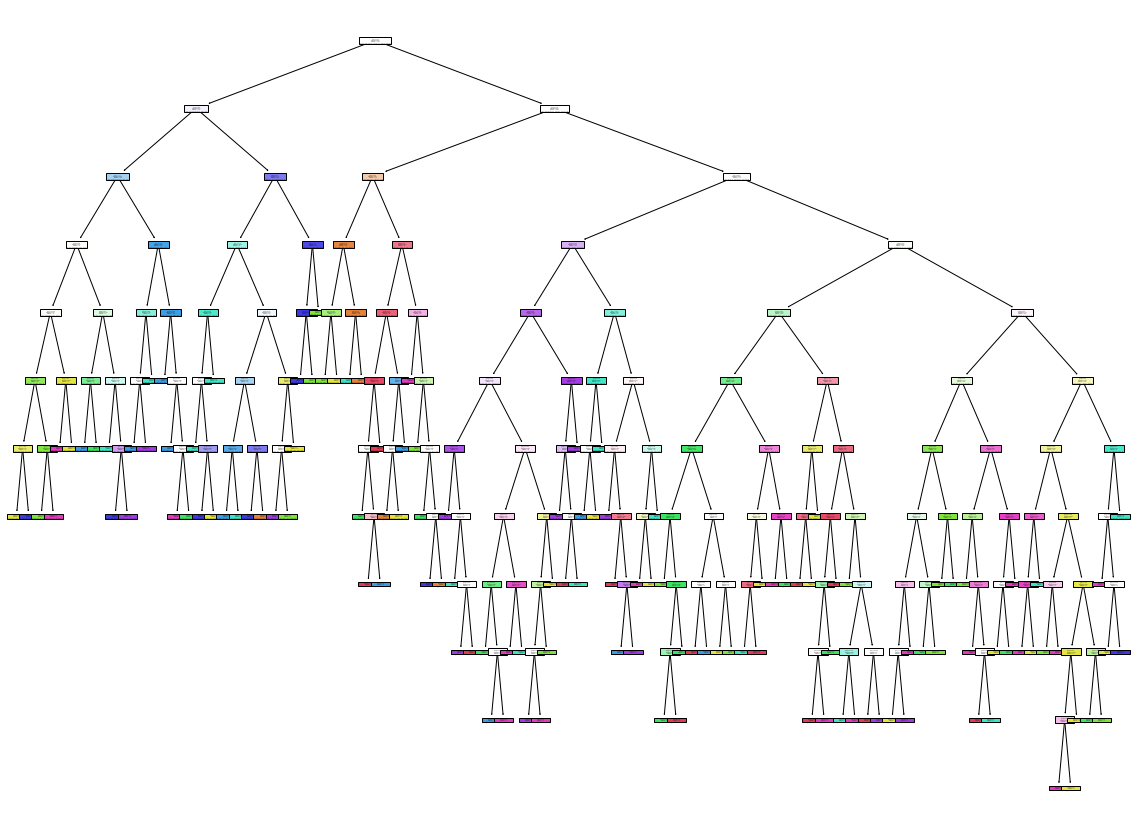

In [90]:
draw_tree(model_tree)

In [91]:
predict = model_tree.predict(X_test)

accuracy: 0.8805555555555555 
     precision: 0.8805555555555555 
     recall: 0.8805555555555555 
     f1_score: 0.8805555555555555


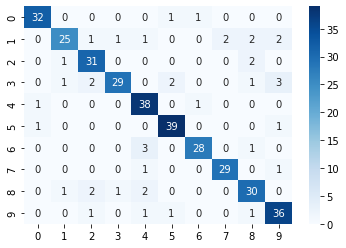

In [92]:
confussion_matrix(y_test, predict)

In [93]:
predict = model_tree.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


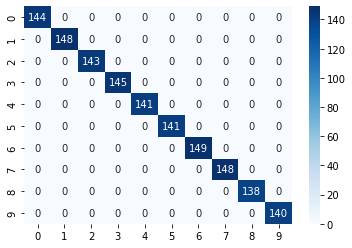

In [94]:
confussion_matrix(y_train, predict)

- <b> 10 </b> <br>
Дерево стало помітно менше, з розміром гірше і стали метрики у всіх виборках, модель сильно <b> недонавчана </b> <br>
- <b>25 </b><br>
Дерево стало більше, але це не допомогло на тестовій виборці, на ній значення метрик стало менше, сама модель перенавченою не стала, одне із найкращих співвідношень результатів метрик тестової на навчальну <br>
- <b> None (default) </b><br>
Є ознаки перенавчання (оскільки ознака стоїть на default, то це дерево повторюється багато разів) <br> 
<b>Дуже складний та чуттєвий параметр для налаштування, у default значення get_n_leaves()=128, що означає найкраща модель на навчальній виборці отримала 128 вузлів, але дерево на 25 вузлів показувало себе на 0.06 по точності гірше, але мала співвідношення точностей тестової до навчальної вибірки близьке до 1, і займала в 5 разів менше вузлів </b>


<font size='5'> max_features: </font> <br>
Ми будемо перевіряти такі значення: 
- None (default, max_features=n_features)
- N/3 (max_features=64/3)
- sqrt (max_features=sqrt(n_features)) <br>

In [95]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_features=None)

In [96]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

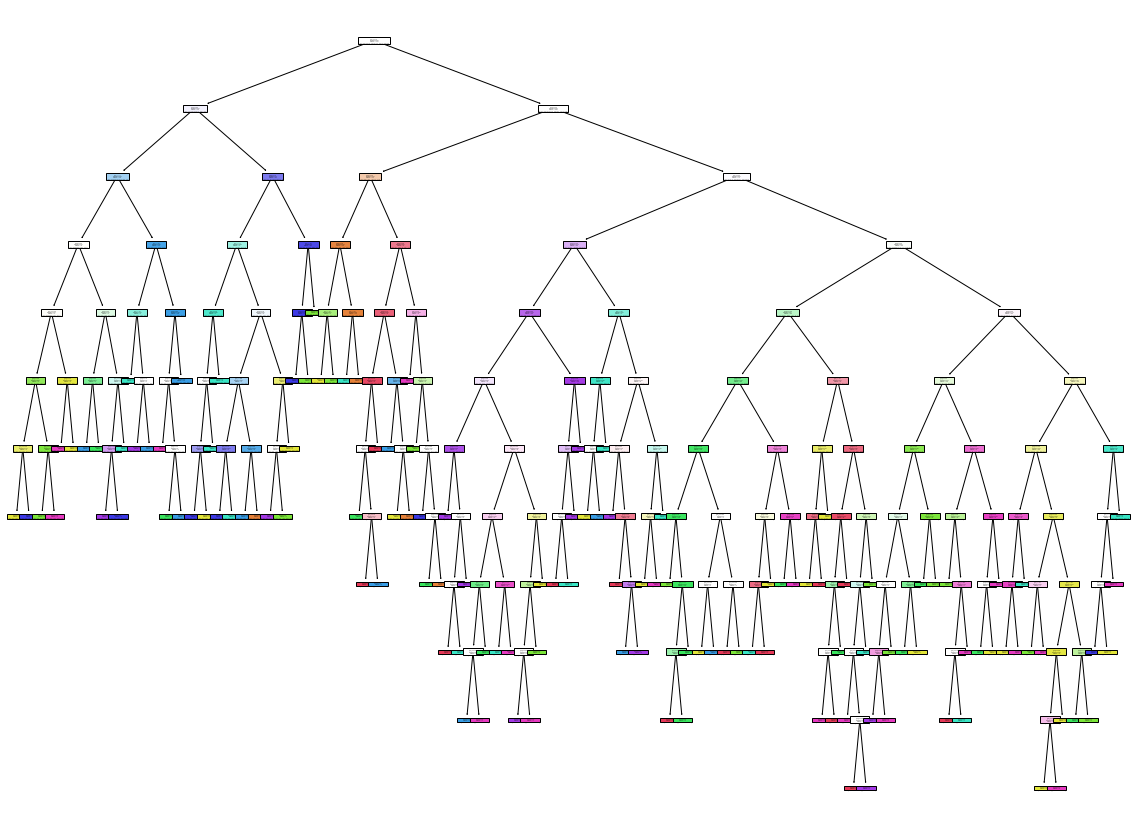

In [97]:
draw_tree(model_tree)

In [98]:
predict = model_tree.predict(X_test)

accuracy: 0.8888888888888888 
     precision: 0.8888888888888888 
     recall: 0.8888888888888888 
     f1_score: 0.8888888888888888


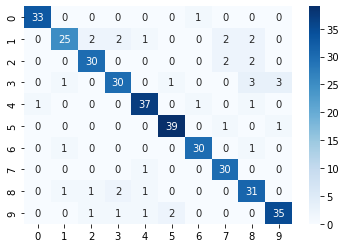

In [99]:
confussion_matrix(y_test, predict)

In [100]:
predict = model_tree.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


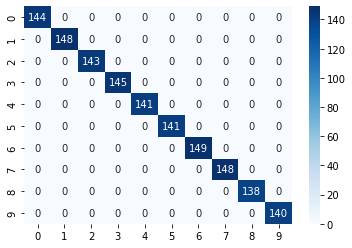

In [101]:
confussion_matrix(y_train, predict)

n/3:

In [115]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_features=21)

In [116]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=21)

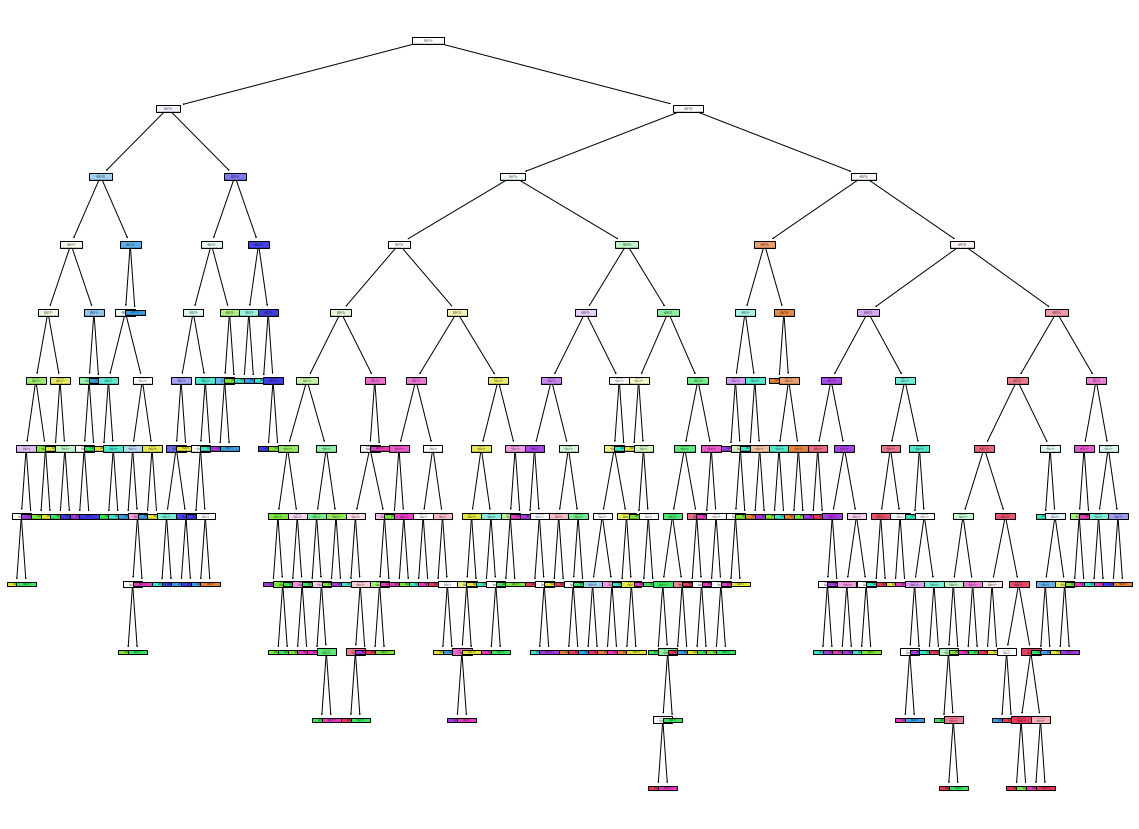

In [117]:
draw_tree(model_tree)

In [118]:
predict = model_tree.predict(X_test)

accuracy: 0.8416666666666667 
     precision: 0.8416666666666667 
     recall: 0.8416666666666667 
     f1_score: 0.8416666666666667


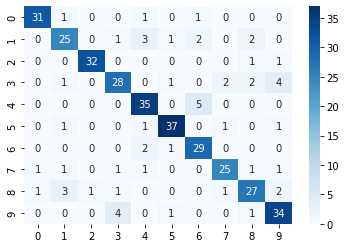

In [119]:
confussion_matrix(y_test, predict)

In [120]:
predict = model_tree.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


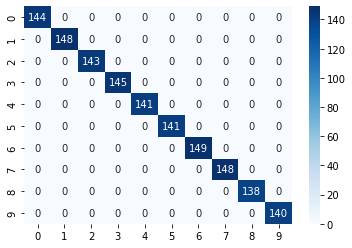

In [121]:
confussion_matrix(y_train, predict)

'sqrt':

In [122]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_features='sqrt')

In [123]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt')

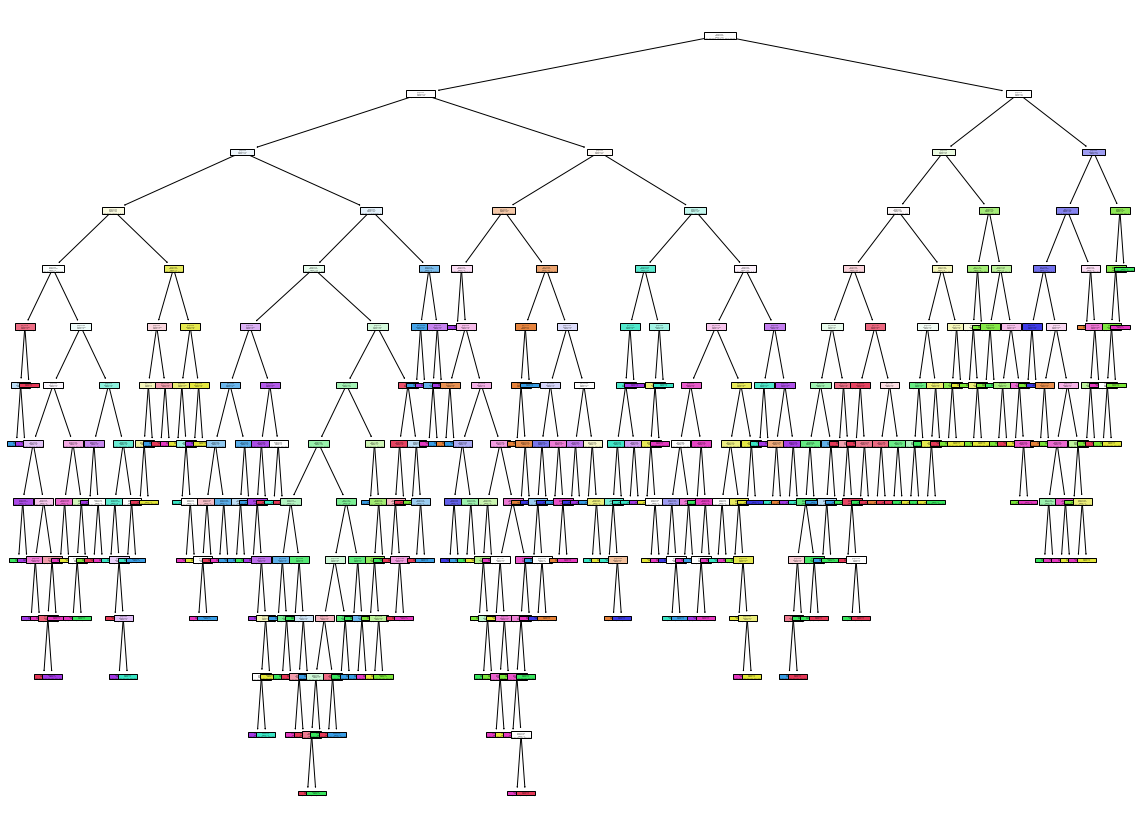

In [124]:
draw_tree(model_tree)

In [125]:
predict = model_tree.predict(X_test)

accuracy: 0.7722222222222223 
     precision: 0.7722222222222223 
     recall: 0.7722222222222223 
     f1_score: 0.7722222222222223


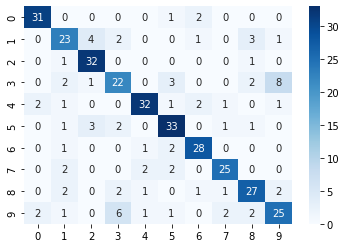

In [126]:
confussion_matrix(y_test, predict)

In [127]:
predict = model_tree.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


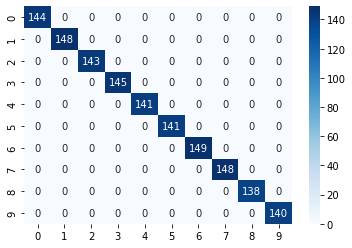

In [128]:
confussion_matrix(y_train, predict)

<b> Видно, що модель у даному випадку на тестовій виборці стає кращою зі збільшенням числа max_features, перенавчання присутнє у всіх, адже параметри які могли б завадити йому не змінювалися </b>

<font size='5'> Пошукаємо найкращі параметри через GridSearchCV (будемо використовувати більшу кількість параметрів з метою перетнути 0.9 accuracy на тестовій виборці)</font>

In [129]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : [5, 10, 20, 40, None],
              'min_samples_split' : [2, 5, 10],
              'min_samples_leaf' : [1, 10, 30, 40],
              'max_leaf_nodes' : [10, 25, 50, 75, None],
              'max_features' : ['sqrt', 10, 20, 50, None]}

GS = GridSearchCV(estimator = DecisionTreeClassifier(),
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  n_jobs = -1)
GS.fit(X_train, y_train)

print(GS.best_score_)
print(GS.best_params_)

0.855265195509098
{'max_depth': 10, 'max_features': 50, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


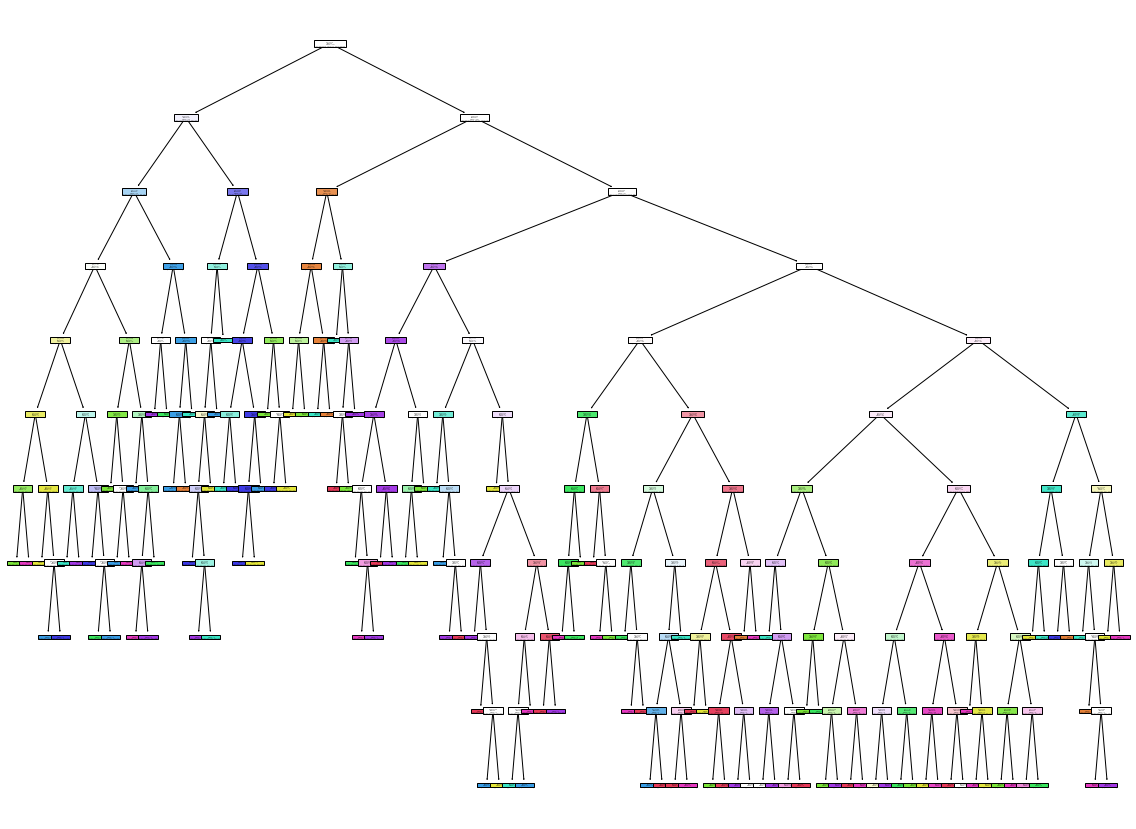

In [130]:
draw_tree(GS.best_estimator_)

In [131]:
predict = GS.best_estimator_.predict(X_test)

accuracy: 0.8555555555555555 
     precision: 0.8555555555555555 
     recall: 0.8555555555555555 
     f1_score: 0.8555555555555555


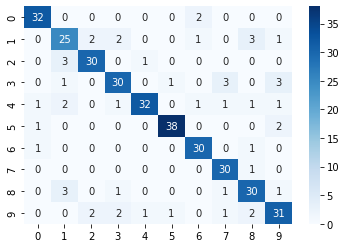

In [132]:
confussion_matrix(y_test, predict)

In [133]:
predict = GS.best_estimator_.predict(X_train)

accuracy: 0.9846903270702854 
     precision: 0.9846903270702854 
     recall: 0.9846903270702854 
     f1_score: 0.9846903270702854


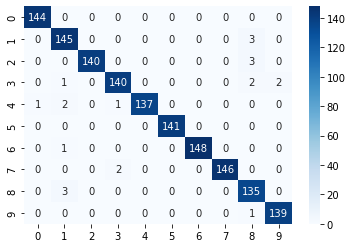

In [134]:
confussion_matrix(y_train, predict)

<b>Завдяки решітчастому пошуку ми не отримали модель зі значенням точності більше 0.9. 
Вона не отримала найбільше значення метрик серед усіх моделей, вище були розглянуті і кращі.
Важливо, що ми не отримали таку ж саму модель як і з default значеннями параметрів, це дало нам розуміння, що налаштовування гіперпараметрів має суттєве значення для отримання гарної моделі.
 </b>
